In [3]:
import pandas as pd
import numpy as np
from model import *
import extractor
class Extractor(extractor.AudioDataExtractionPipeline):
    pass

In [4]:
import pandas as pd
df = pd.read_csv("dataset/Data/features_30_sec.csv")
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [5]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['label'])  # Features: e.g., 'track' and 'statistics'
y = df['label']  # Target: 'label'

# Split the dataset while preserving class proportions
X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, 
    test_size=0.3,  # 30% for testing
    stratify=y,     # Preserve class proportions
    random_state=42 # For reproducibility
)

In [6]:
# Drop corrupted sample 
idx = X_train.index[X_train["filename"] == "jazz.00054.wav"]
X_train = X_train.drop(index=idx)
y_train = y_train.drop(index=idx)

In [7]:
model, acc = train_and_evaluate_catboost(
    X_eval.index.to_numpy(), 
    X_train.drop(columns=["filename", "length"]).to_numpy(), 
    X_eval.drop(columns=["filename", "length"]).to_numpy(), 
    y_train.to_numpy(), 
    y_eval.to_numpy()
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3648069	test: 0.3433333	best: 0.3433333 (0)	total: 61.1ms	remaining: 30.5s
50:	learn: 0.7367668	test: 0.6566667	best: 0.6700000 (47)	total: 194ms	remaining: 1.71s
100:	learn: 0.8211731	test: 0.7200000	best: 0.7233333 (98)	total: 321ms	remaining: 1.27s
150:	learn: 0.8726753	test: 0.7300000	best: 0.7400000 (122)	total: 450ms	remaining: 1.04s
200:	learn: 0.9070100	test: 0.7366667	best: 0.7466667 (182)	total: 566ms	remaining: 842ms
250:	learn: 0.9313305	test: 0.7366667	best: 0.7533333 (218)	total: 681ms	remaining: 675ms
300:	learn: 0.9484979	test: 0.7533333	best: 0.7533333 (218)	total: 795ms	remaining: 525ms
350:	learn: 0.9670959	test: 0.7466667	best: 0.7600000 (318)	total: 909ms	remaining: 386ms
400:	learn: 0.9728183	test: 0.7466667	best: 0.7600000 (318)	total: 1.04s	remaining: 257ms
450:	learn: 0.9756795	test: 0.7400000	best: 0.7600000 (318)	total: 1.16s	remaining: 126ms
499:	learn: 0.9842632	test: 0.7466667	best: 0.7600000 (318)	total: 1.35s	remaining: 0us

bestTest = 0.76
b

In [8]:
import soundfile as sf
import librosa
import numpy as np
from resampy import resample

In [9]:
E_train = Extractor(
    idx=[np.array([row[0]]) for row in X_train.iterrows()],
    x=[row[1].to_numpy() for row in X_train.iterrows()],
    y=[np.array([row]) for row in y_train],
    train=True
)
E_eval = Extractor(
    idx=[np.array([row[0]]) for row in X_eval.iterrows()],
    x=[row[1].to_numpy() for row in X_eval.iterrows()],
    y=[np.array([row]) for row in y_eval],
    train=False
)

def load_audio(x) -> [np.ndarray]:
    file_path = f"dataset/Data/genres_original/{x[0].split('.')[0]}/{x[0]}"
    y, sr = sf.read(file_path)
    if len(y.shape) == 2:  # Convert stereo to mono
        y = np.mean(y, dim=0)
    y = resample(y, sr, 16000)
    return y
Extractor.register_extractor('audio', load_audio)
E_train.full_extract()
E_eval.full_extract()

audio:   0%|          | 0/699 [00:00<?, ?it/s]

audio:   0%|          | 0/300 [00:00<?, ?it/s]

In [10]:
Extractor.register_extractor('stats', lambda x: x[2:])
Extractor.register_extractor('rms', lambda audio: np.array([np.sqrt(np.mean(audio**2))]))
E_train.soft_extract()
E_eval.soft_extract()

stats:   0%|          | 0/699 [00:00<?, ?it/s]

rms:   0%|          | 0/699 [00:00<?, ?it/s]

stats:   0%|          | 0/300 [00:00<?, ?it/s]

rms:   0%|          | 0/300 [00:00<?, ?it/s]

In [11]:
import librosa
import soundfile as sf
from resampy import resample
from tqdm.notebook import tqdm

sr = 16000
hop_length = 512
n_mfcc = 13
n_mels = 128
n_bins = 84
bins_per_octave = 12
fmin = librosa.note_to_hz("C1")


def mel(audio):
    # Calculate MelSpectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to decibel scale
    return mel_spectrogram

Extractor.register_extractor('mel', mel)
Extractor.register_extractor('cqt', lambda audio: np.abs(librosa.cqt(audio, sr=sr, hop_length=hop_length, fmin=fmin, bins_per_octave=bins_per_octave, n_bins=n_bins)))
# Extractor.register_extractor('stft', lambda audio: librosa.stft(audio, hop_length=hop_length))
Extractor.register_extractor('mfcc', lambda audio: librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc))


In [12]:
E_train.soft_extract()
E_eval.soft_extract()

mel:   0%|          | 0/699 [00:00<?, ?it/s]

cqt:   0%|          | 0/699 [00:00<?, ?it/s]

mfcc:   0%|          | 0/699 [00:00<?, ?it/s]

mel:   0%|          | 0/300 [00:00<?, ?it/s]

cqt:   0%|          | 0/300 [00:00<?, ?it/s]

mfcc:   0%|          | 0/300 [00:00<?, ?it/s]

In [13]:
import matplotlib.pyplot as plt

In [14]:
hop_length=512
Extractor.register_extractor('bpm_beat', lambda audio: librosa.beat.beat_track(y=audio, sr=sr, hop_length=hop_length))
Extractor.register_extractor('bpm', lambda bpm_beat: bpm_beat[0])
Extractor.register_extractor('beat', lambda bpm_beat: bpm_beat[1])

In [15]:
E_train.soft_extract()
E_eval.soft_extract()

bpm_beat:   0%|          | 0/699 [00:00<?, ?it/s]

bpm:   0%|          | 0/699 [00:00<?, ?it/s]

beat:   0%|          | 0/699 [00:00<?, ?it/s]

bpm_beat:   0%|          | 0/300 [00:00<?, ?it/s]

bpm:   0%|          | 0/300 [00:00<?, ?it/s]

beat:   0%|          | 0/300 [00:00<?, ?it/s]

In [16]:
Extractor.register_extractor('cqt_hpss', lambda cqt: librosa.decompose.hpss(cqt))
Extractor.register_extractor('harmonic', lambda cqt_hpss: cqt_hpss[0])
Extractor.register_extractor('percussive', lambda cqt_hpss: cqt_hpss[1])

In [17]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_hpss:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic:   0%|          | 0/699 [00:00<?, ?it/s]

percussive:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_hpss:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic:   0%|          | 0/300 [00:00<?, ?it/s]

percussive:   0%|          | 0/300 [00:00<?, ?it/s]

(0.0, 30.0)

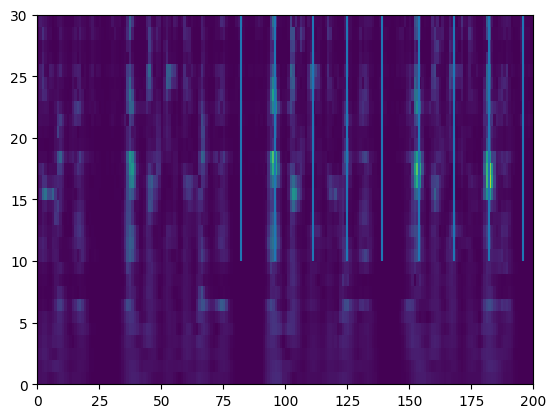

In [18]:
plt.pcolor(E_train.features['percussive'][0])
plt.vlines(E_train.features['beat'][0], 10, 30)
plt.xlim(0, 200)
plt.ylim(0, 30)

In [19]:
Extractor.register_extractor('cqt_per_freq_mean', lambda cqt: cqt.mean(axis=1))
Extractor.register_extractor('cqt_per_freq_var', lambda cqt: cqt.var(axis=1))
Extractor.register_extractor('harmonic_per_freq_mean', lambda harmonic: harmonic.mean(axis=1))
Extractor.register_extractor('harmonic_per_freq_var', lambda harmonic: harmonic.var(axis=1))
Extractor.register_extractor('percussive_per_freq_mean', lambda percussive: percussive.mean(axis=1))
Extractor.register_extractor('percussive_per_freq_var', lambda percussive: percussive.var(axis=1))

In [20]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_per_freq_mean:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_per_freq_var:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic_per_freq_mean:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic_per_freq_var:   0%|          | 0/699 [00:00<?, ?it/s]

percussive_per_freq_mean:   0%|          | 0/699 [00:00<?, ?it/s]

percussive_per_freq_var:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_per_freq_mean:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_per_freq_var:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic_per_freq_mean:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic_per_freq_var:   0%|          | 0/300 [00:00<?, ?it/s]

percussive_per_freq_mean:   0%|          | 0/300 [00:00<?, ?it/s]

percussive_per_freq_var:   0%|          | 0/300 [00:00<?, ?it/s]

In [21]:
features = ['cqt_per_freq_mean', 'cqt_per_freq_var', 'harmonic_per_freq_mean', 'harmonic_per_freq_var', 'percussive_per_freq_mean', 'percussive_per_freq_var']

model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['y'])[:,0], 
    y_eval=E_eval.get_features(['y'])[:,0],
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2660944	test: 0.3000000	best: 0.3000000 (0)	total: 62.1ms	remaining: 31s
50:	learn: 0.6838340	test: 0.5666667	best: 0.5700000 (47)	total: 1.04s	remaining: 9.19s
100:	learn: 0.7711016	test: 0.6166667	best: 0.6200000 (78)	total: 2.04s	remaining: 8.07s
150:	learn: 0.8183119	test: 0.6500000	best: 0.6500000 (150)	total: 2.98s	remaining: 6.88s
200:	learn: 0.8555079	test: 0.6600000	best: 0.6666667 (196)	total: 3.91s	remaining: 5.82s
250:	learn: 0.8955651	test: 0.6800000	best: 0.6833333 (243)	total: 4.88s	remaining: 4.84s
300:	learn: 0.9113019	test: 0.6800000	best: 0.6933333 (299)	total: 6.1s	remaining: 4.03s
350:	learn: 0.9284692	test: 0.6933333	best: 0.6933333 (299)	total: 7.02s	remaining: 2.98s
400:	learn: 0.9384835	test: 0.7000000	best: 0.7066667 (383)	total: 7.96s	remaining: 1.97s
450:	learn: 0.9527897	test: 0.7033333	best: 0.7066667 (383)	total: 8.89s	remaining: 966ms
499:	learn: 0.9656652	test: 0.7100000	best: 0.7100000 (459)	total: 9.88s	remaining: 0us

bestTest = 0.71
best

In [22]:
Extractor.register_extractor('mfcc_quef_mean', lambda mfcc: mfcc.mean(axis=1))
Extractor.register_extractor('mfcc_quef_var', lambda mfcc: mfcc.var(axis=1))

# Usually STFT is used for spectral centroid, but I will use CQT, it may turn out to be even more precise.
cqt_frequencies = librosa.cqt_frequencies(n_bins=n_bins, fmin=fmin, bins_per_octave=bins_per_octave)
# Extractor.register_extractor('cqt_spectral_centroid', 
#                              lambda cqt: np.sum(cqt_frequencies.reshape(-1, 1) * librosa.util.normalize(cqt, norm=1, axis=0), axis=0))
Extractor.register_extractor('cqt_spectral_centroid', 
                             lambda audio: librosa.feature.spectral_centroid(y=audio, sr=sr))

Extractor.register_extractor('cqt_spectral_centroid_mean', lambda cqt_spectral_centroid: cqt_spectral_centroid.mean())
Extractor.register_extractor('cqt_spectral_centroid_var', lambda cqt_spectral_centroid: cqt_spectral_centroid.var())

cqt_frequencies = librosa.cqt_frequencies(n_bins=n_bins, fmin=fmin, bins_per_octave=bins_per_octave)
chroma_map = librosa.filters.cq_to_chroma(cqt_frequencies.shape[0], bins_per_octave=bins_per_octave, n_chroma=bins_per_octave, fmin=fmin)
Extractor.register_extractor('cqt_chroma', 
                             lambda cqt: np.dot(chroma_map, cqt))
Extractor.register_extractor('cqt_chroma_freq_mean', lambda cqt_chroma: cqt_chroma.mean(axis=1))
Extractor.register_extractor('cqt_chroma_freq_var', lambda cqt_chroma: cqt_chroma.var(axis=1))
Extractor.register_extractor('cqt_chroma_mean', lambda cqt_chroma: cqt_chroma.mean())
Extractor.register_extractor('cqt_chroma_var', lambda cqt_chroma: cqt_chroma.var())

Extractor.register_extractor('harmonic_chroma', 
                             lambda harmonic: np.dot(chroma_map, harmonic))
Extractor.register_extractor('harmonic_chroma_freq_mean', lambda harmonic_chroma: harmonic_chroma.mean(axis=1))
Extractor.register_extractor('harmonic_chroma_freq_var', lambda harmonic_chroma: harmonic_chroma.var(axis=1))
Extractor.register_extractor('harmonic_chroma_mean', lambda harmonic_chroma: harmonic_chroma.mean())
Extractor.register_extractor('harmonic_chroma_var', lambda harmonic_chroma: harmonic_chroma.var())

roll_percent = 0.85
# Extractor.register_extractor('cqt_rolloff', 
#                              lambda cqt: librosa.feature.spectral.spectral_rolloff(S=cqt, freq=cqt_frequencies, roll_percent=roll_percent))
Extractor.register_extractor('cqt_rolloff', 
                             lambda audio: librosa.feature.spectral.spectral_rolloff(y=audio, sr=sr, roll_percent=roll_percent))

Extractor.register_extractor('cqt_rolloff_mean', lambda cqt_rolloff: cqt_rolloff.mean())
Extractor.register_extractor('cqt_rolloff_var', lambda cqt_rolloff: cqt_rolloff.var())

# Extractor.register_extractor('cqt_bandwidth', 
#                              lambda cqt: librosa.feature.spectral.spectral_bandwidth(S=cqt, freq=cqt_frequencies))
Extractor.register_extractor('cqt_bandwidth', 
                             lambda audio: librosa.feature.spectral.spectral_bandwidth(y=audio, sr=sr))

Extractor.register_extractor('cqt_bandwidth_mean', lambda cqt_bandwidth: cqt_bandwidth.mean())
Extractor.register_extractor('cqt_bandwidth_var', lambda cqt_bandwidth: cqt_bandwidth.var())

Extractor.register_extractor('zero_crossing_rate', 
                             lambda audio: librosa.feature.zero_crossing_rate(y=audio))

Extractor.register_extractor('zero_crossing_rate_mean', lambda zero_crossing_rate: zero_crossing_rate.mean())
Extractor.register_extractor('zero_crossing_rate_var', lambda zero_crossing_rate: zero_crossing_rate.var())


Extractor.register_extractor('percept', lambda cqt: librosa.perceptual_weighting(cqt**2, cqt_frequencies, ref=np.max))
Extractor.register_extractor('percept_freq_mean', lambda percept: percept.mean(axis=1))
Extractor.register_extractor('percept_freq_var', lambda percept: percept.var(axis=1))
Extractor.register_extractor('percept_mean', lambda percept: percept.mean())
Extractor.register_extractor('percept_var', lambda percept: percept.var())

In [23]:
E_train.soft_extract()
E_eval.soft_extract()

mfcc_quef_mean:   0%|          | 0/699 [00:00<?, ?it/s]

mfcc_quef_var:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_spectral_centroid:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_spectral_centroid_mean:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_spectral_centroid_var:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_chroma:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_chroma_freq_mean:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_chroma_freq_var:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_chroma_mean:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_chroma_var:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic_chroma:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic_chroma_freq_mean:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic_chroma_freq_var:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic_chroma_mean:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic_chroma_var:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_rolloff:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_rolloff_mean:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_rolloff_var:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_bandwidth:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_bandwidth_mean:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_bandwidth_var:   0%|          | 0/699 [00:00<?, ?it/s]

zero_crossing_rate:   0%|          | 0/699 [00:00<?, ?it/s]

zero_crossing_rate_mean:   0%|          | 0/699 [00:00<?, ?it/s]

zero_crossing_rate_var:   0%|          | 0/699 [00:00<?, ?it/s]

percept:   0%|          | 0/699 [00:00<?, ?it/s]

percept_freq_mean:   0%|          | 0/699 [00:00<?, ?it/s]

percept_freq_var:   0%|          | 0/699 [00:00<?, ?it/s]

percept_mean:   0%|          | 0/699 [00:00<?, ?it/s]

percept_var:   0%|          | 0/699 [00:00<?, ?it/s]

mfcc_quef_mean:   0%|          | 0/300 [00:00<?, ?it/s]

mfcc_quef_var:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_spectral_centroid:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_spectral_centroid_mean:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_spectral_centroid_var:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_chroma:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_chroma_freq_mean:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_chroma_freq_var:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_chroma_mean:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_chroma_var:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic_chroma:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic_chroma_freq_mean:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic_chroma_freq_var:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic_chroma_mean:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic_chroma_var:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_rolloff:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_rolloff_mean:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_rolloff_var:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_bandwidth:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_bandwidth_mean:   0%|          | 0/300 [00:00<?, ?it/s]

cqt_bandwidth_var:   0%|          | 0/300 [00:00<?, ?it/s]

zero_crossing_rate:   0%|          | 0/300 [00:00<?, ?it/s]

zero_crossing_rate_mean:   0%|          | 0/300 [00:00<?, ?it/s]

zero_crossing_rate_var:   0%|          | 0/300 [00:00<?, ?it/s]

percept:   0%|          | 0/300 [00:00<?, ?it/s]

percept_freq_mean:   0%|          | 0/300 [00:00<?, ?it/s]

percept_freq_var:   0%|          | 0/300 [00:00<?, ?it/s]

percept_mean:   0%|          | 0/300 [00:00<?, ?it/s]

percept_var:   0%|          | 0/300 [00:00<?, ?it/s]

In [24]:
features = ['rms', 'bpm',
    'cqt_per_freq_mean', 'cqt_per_freq_var', 
    'harmonic_per_freq_mean', 'harmonic_per_freq_var', 
    'percussive_per_freq_mean', 'percussive_per_freq_var',
    'mfcc_quef_mean', 'mfcc_quef_var', 
    'cqt_spectral_centroid_mean', 'cqt_spectral_centroid_var', 
    'cqt_chroma_mean', 'cqt_chroma_var', 
    'harmonic_chroma_freq_mean', 'harmonic_chroma_freq_var', 
    'cqt_rolloff_mean', 'cqt_rolloff_var', 
    'cqt_bandwidth_mean', 'cqt_bandwidth_var',
    'percept_freq_mean', 'percept_freq_var']

model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['y'])[:,0], 
    y_eval=E_eval.get_features(['y'])[:,0],
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2732475	test: 0.2966667	best: 0.2966667 (0)	total: 114ms	remaining: 57s
50:	learn: 0.7038627	test: 0.6200000	best: 0.6300000 (47)	total: 1.61s	remaining: 14.2s
100:	learn: 0.8211731	test: 0.6666667	best: 0.6700000 (97)	total: 3.04s	remaining: 12s
150:	learn: 0.8640916	test: 0.7133333	best: 0.7133333 (150)	total: 4.37s	remaining: 10.1s
200:	learn: 0.9012876	test: 0.7266667	best: 0.7400000 (188)	total: 5.76s	remaining: 8.58s
250:	learn: 0.9227468	test: 0.7333333	best: 0.7400000 (188)	total: 7.16s	remaining: 7.1s
300:	learn: 0.9356223	test: 0.7433333	best: 0.7433333 (267)	total: 8.53s	remaining: 5.64s
350:	learn: 0.9456366	test: 0.7433333	best: 0.7500000 (345)	total: 9.86s	remaining: 4.18s
400:	learn: 0.9527897	test: 0.7433333	best: 0.7566667 (372)	total: 11.2s	remaining: 2.76s
450:	learn: 0.9628040	test: 0.7466667	best: 0.7566667 (372)	total: 12.6s	remaining: 1.37s
499:	learn: 0.9799714	test: 0.7500000	best: 0.7600000 (475)	total: 13.9s	remaining: 0us

bestTest = 0.76
bestIte

In [25]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
mfcc_quef_mean_3,2.359190
mfcc_quef_var_8,2.358319
mfcc_quef_var_3,2.214395
percussive_per_freq_var_19,1.399441
percussive_per_freq_mean_15,1.380568
percept_freq_var_1,1.320246
percussive_per_freq_mean_18,1.249470
mfcc_quef_var_2,1.248530
percept_freq_mean_8,1.225092
percussive_per_freq_var_29,1.154247


In [26]:
features = ['stats',
    'cqt_per_freq_mean', 'cqt_per_freq_var', 
    'harmonic_per_freq_mean', 'harmonic_per_freq_var', 
    'percussive_per_freq_mean', 'percussive_per_freq_var',
    'mfcc_quef_mean', 'mfcc_quef_var', 
    'cqt_spectral_centroid_mean', 'cqt_spectral_centroid_var', 
    'cqt_chroma_freq_mean', 'cqt_chroma_freq_var', 
    'harmonic_chroma_freq_mean', 'harmonic_chroma_freq_var',
    'cqt_rolloff_mean', 'cqt_rolloff_var', 
    'cqt_bandwidth_mean', 'cqt_bandwidth_var',
    'percept_freq_mean', 'percept_freq_var']

model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['y'])[:,0], 
    y_eval=E_eval.get_features(['y'])[:,0],
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3018598	test: 0.2800000	best: 0.2800000 (0)	total: 69.8ms	remaining: 34.9s
50:	learn: 0.7467811	test: 0.6733333	best: 0.6800000 (49)	total: 1.64s	remaining: 14.4s
100:	learn: 0.8426323	test: 0.7233333	best: 0.7266667 (78)	total: 3.13s	remaining: 12.4s
150:	learn: 0.8955651	test: 0.7666667	best: 0.7733333 (139)	total: 4.64s	remaining: 10.7s
200:	learn: 0.9213162	test: 0.8000000	best: 0.8000000 (200)	total: 6.13s	remaining: 9.13s
250:	learn: 0.9413448	test: 0.7966667	best: 0.8033333 (242)	total: 7.61s	remaining: 7.54s
300:	learn: 0.9585122	test: 0.7933333	best: 0.8033333 (242)	total: 9.07s	remaining: 6s
350:	learn: 0.9728183	test: 0.7933333	best: 0.8033333 (242)	total: 10.6s	remaining: 4.5s
400:	learn: 0.9785408	test: 0.7966667	best: 0.8033333 (242)	total: 12.2s	remaining: 3s
450:	learn: 0.9828326	test: 0.8033333	best: 0.8033333 (242)	total: 13.6s	remaining: 1.48s
499:	learn: 0.9899857	test: 0.8066667	best: 0.8100000 (463)	total: 15.1s	remaining: 0us

bestTest = 0.81
bestIter

In [27]:
imp = pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)
imp['stat_name'] = pd.Series(imp.index, index=imp.index).apply(lambda x: int(x[6:]) if x.startswith('stats_') else None)
imp['stat_name'] = imp['stat_name'].apply(lambda x: X_train.columns[int(x) + 2] if not np.isnan(x) else None)
imp

,importance,stat_name
stats_0,2.523169,chroma_stft_mean
stats_6,1.797094,spectral_bandwidth_mean
stats_23,1.583620,mfcc4_mean
stats_33,1.515491,mfcc9_mean
percussive_per_freq_mean_22,1.454783,None
stats_39,1.381583,mfcc12_mean
mfcc_quef_var_4,1.311128,None
stats_9,1.279369,rolloff_var
percussive_per_freq_var_21,1.255095,None
percept_freq_mean_75,1.246075,None


In [34]:
from sklearn.decomposition import TruncatedSVD, PCA

n_tsvd_components = 15
n_svd_iter=20

features = ['stats',
    'cqt_per_freq_mean', 'cqt_per_freq_var', 
    'harmonic_per_freq_mean', 'harmonic_per_freq_var', 
    'percussive_per_freq_mean', 'percussive_per_freq_var',
    'mfcc_quef_mean', 'mfcc_quef_var', 
    'cqt_spectral_centroid_mean', 'cqt_spectral_centroid_var', 
    'cqt_chroma_freq_mean', 'cqt_chroma_freq_var', 
    'harmonic_chroma_freq_mean', 'harmonic_chroma_freq_var',
    'cqt_rolloff_mean', 'cqt_rolloff_var', 
    'cqt_bandwidth_mean', 'cqt_bandwidth_var',
    'percept_freq_mean', 'percept_freq_var']

Extractor.register_sklearn_extractor('cqt_per_freq_mean_svd', 
                                     ['cqt_per_freq_mean'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('cqt_per_freq_var_svd', 
                                     ['cqt_per_freq_var'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('harmonic_per_freq_mean_svd', 
                                     ['harmonic_per_freq_mean'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('harmonic_per_freq_var_svd', 
                                     ['harmonic_per_freq_var'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('percussive_per_freq_mean_svd', 
                                     ['percussive_per_freq_mean'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('percussive_per_freq_var_svd', 
                                     ['percussive_per_freq_var'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('percept_freq_mean_svd', 
                                     ['percept_freq_mean'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('percept_freq_var_svd', 
                                     ['percept_freq_var'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))

In [33]:
for feat in list(E_train.features.keys()):
    if feat.endswith('svd'):
        del E_train.features[feat]
        del E_eval.features[feat]

In [35]:
E_train.soft_extract()
E_eval.soft_extract()

In [38]:
features = ['rms', 'bpm',
    'cqt_per_freq_mean_svd', 'cqt_per_freq_var_svd', 
    'harmonic_per_freq_mean_svd', 'harmonic_per_freq_var_svd', 
    'percussive_per_freq_mean_svd', 'percussive_per_freq_var_svd',
    'mfcc_quef_mean', 'mfcc_quef_var', 
    'cqt_spectral_centroid_mean', 'cqt_spectral_centroid_var', 
    'cqt_chroma_mean', 'cqt_chroma_var', 
    'harmonic_chroma_freq_mean', 'harmonic_chroma_freq_var', 
    'cqt_rolloff_mean', 'cqt_rolloff_var', 
    'cqt_bandwidth_mean', 'cqt_bandwidth_var',
    'percept_freq_mean_svd', 'percept_freq_var_svd']

model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['y'])[:,0], 
    y_eval=E_eval.get_features(['y'])[:,0],
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3047210	test: 0.2966667	best: 0.2966667 (0)	total: 19.9ms	remaining: 9.95s
50:	learn: 0.7424893	test: 0.6400000	best: 0.6400000 (50)	total: 524ms	remaining: 4.61s
100:	learn: 0.8483548	test: 0.7100000	best: 0.7133333 (99)	total: 962ms	remaining: 3.8s
150:	learn: 0.8998569	test: 0.7333333	best: 0.7333333 (142)	total: 1.35s	remaining: 3.13s
200:	learn: 0.9298999	test: 0.7466667	best: 0.7500000 (175)	total: 1.72s	remaining: 2.56s
250:	learn: 0.9484979	test: 0.7600000	best: 0.7600000 (238)	total: 2.13s	remaining: 2.12s
300:	learn: 0.9570815	test: 0.7666667	best: 0.7666667 (297)	total: 2.52s	remaining: 1.66s
350:	learn: 0.9670959	test: 0.7733333	best: 0.7766667 (332)	total: 2.9s	remaining: 1.23s
400:	learn: 0.9728183	test: 0.7633333	best: 0.7766667 (332)	total: 3.27s	remaining: 807ms
450:	learn: 0.9828326	test: 0.7733333	best: 0.7766667 (332)	total: 3.73s	remaining: 406ms
499:	learn: 0.9885551	test: 0.7700000	best: 0.7766667 (332)	total: 4.24s	remaining: 0us

bestTest = 0.776666

In [42]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
percussive_per_freq_mean_svd_0,4.205752
mfcc_quef_mean_3,3.267344
percept_freq_var_svd_1,3.180768
percept_freq_mean_svd_0,2.635458
percept_freq_var_svd_3,2.591597
mfcc_quef_var_8,2.577771
mfcc_quef_var_4,2.278346
percussive_per_freq_var_svd_2,2.050827
percept_freq_mean_svd_1,1.956709
cqt_per_freq_mean_svd_2,1.855102


In [165]:
fmax=300
Extractor.register_extractor('pyin', lambda audio: librosa.pyin(y=audio, sr=sr, fmin=fmin, fmax=fmax))
Extractor.register_extractor('f0', lambda pyin: pyin[0])
Extractor.register_extractor('f0_mean', lambda f0: np.mean(f0))
Extractor.register_extractor('f0_var', lambda f0: np.var(f0))
Extractor.register_extractor('voiced', lambda pyin: pyin[1])
Extractor.register_extractor('voiced_f0', lambda f0, voiced: f0[voiced])
Extractor.register_extractor('voiced_f0_mean', lambda f0: np.mean(f0))
Extractor.register_extractor('voiced_f0_var', lambda f0: np.var(f0))
Extractor.register_extractor('voiced_percent', lambda voiced: np.mean(voiced))

In [170]:
E_train.soft_extract()
E_eval.soft_extract()

overtones:   0%|          | 0/699 [00:00<?, ?it/s]

overtones_freq_mean:   0%|          | 0/699 [00:00<?, ?it/s]

AttributeError: 'int' object has no attribute 'dtype'

In [164]:
features = ['rms', 'bpm',
    'cqt_per_freq_mean_svd', 'cqt_per_freq_var_svd', 
    'harmonic_per_freq_mean_svd', 'harmonic_per_freq_var_svd', 
    'percussive_per_freq_mean_svd', 'percussive_per_freq_var_svd',
    'mfcc_quef_mean', 'mfcc_quef_var', 
    'cqt_spectral_centroid_mean', 'cqt_spectral_centroid_var', 
    'cqt_chroma_mean', 'cqt_chroma_var', 
    'harmonic_chroma_freq_mean', 'harmonic_chroma_freq_var', 
    'cqt_rolloff_mean', 'cqt_rolloff_var', 
    'cqt_bandwidth_mean', 'cqt_bandwidth_var',
    'percept_freq_mean_svd', 'percept_freq_var_svd',
    'voiced_f0_mean', 'f0_var']

model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['y'])[:,0], 
    y_eval=E_eval.get_features(['y'])[:,0],
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2288984	test: 0.2133333	best: 0.2133333 (0)	total: 35.8ms	remaining: 17.9s
50:	learn: 0.7639485	test: 0.6800000	best: 0.6933333 (43)	total: 457ms	remaining: 4.02s
100:	learn: 0.8540773	test: 0.7333333	best: 0.7366667 (94)	total: 861ms	remaining: 3.4s
150:	learn: 0.8912732	test: 0.7666667	best: 0.7666667 (149)	total: 1.29s	remaining: 2.99s
200:	learn: 0.9227468	test: 0.7766667	best: 0.7800000 (186)	total: 1.69s	remaining: 2.51s
250:	learn: 0.9399142	test: 0.7666667	best: 0.7800000 (186)	total: 2.09s	remaining: 2.07s
300:	learn: 0.9599428	test: 0.7800000	best: 0.7800000 (186)	total: 2.48s	remaining: 1.64s
350:	learn: 0.9742489	test: 0.7800000	best: 0.7833333 (341)	total: 2.86s	remaining: 1.21s
400:	learn: 0.9799714	test: 0.7800000	best: 0.7833333 (341)	total: 3.21s	remaining: 794ms
450:	learn: 0.9856938	test: 0.7833333	best: 0.7833333 (341)	total: 3.6s	remaining: 391ms
499:	learn: 0.9856938	test: 0.7866667	best: 0.7900000 (465)	total: 3.96s	remaining: 0us

bestTest = 0.79
bes

**ChatGPT query**
Please write a small snippet of code. It should shift CQT spectrogram down based on F0 and crop to 40 frequency bins. F0 is given in Hz, CQT frequencies are in separate array cqt_frequencies

In [117]:
def shift_cqt_by_f0(S: np.ndarray, F0: np.ndarray, voiced: np.ndarray, cqt_frequencies: np.ndarray) -> np.ndarray:
    """
    Shift CQT spectrogram down based on F0 and crop to 40 frequency bins.
    
    Parameters
    ----------
    S : np.ndarray
        CQT spectrogram, shape (n_freq, n_frames).
    F0 : float
        Fundamental frequency in Hz.
    cqt_frequencies : np.ndarray
        Array of center frequencies for the CQT bins, sorted ascending.
        
    Returns
    -------
    S_cropped : np.ndarray
        Shifted and cropped CQT spectrogram, shape (40, n_frames).
    """
    # 1. Find which bin is closest to F0
    F0[~voiced] = 0
    offsets = np.argmin(np.abs(cqt_frequencies.reshape(-1, 1) - F0.reshape(1, -1)), axis=0)

    # 2. Shift the spectrogram so that this bin appears near the top
    #    Negative offset rolls elements upward (towards index 0).
    S = np.array([np.roll(frame, -offset) for frame, offset in zip(S.T, offsets)]).T
    return S[:40, voiced]

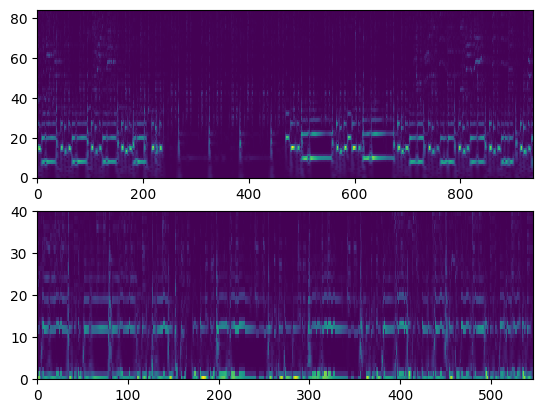

In [118]:
plt.subplot(2, 1, 1)
plt.pcolor(E_train.features['cqt'][0])
chifted_cqt = shift_cqt_by_f0(E_train.features['cqt'][0], 
                              E_train.features['f0'][0], 
                              E_train.features['voiced'][0], 
                              cqt_frequencies)
plt.subplot(2, 1, 2)
plt.pcolor(chifted_cqt)

In [190]:
Extractor.register_extractor('overtones', lambda cqt, f0, voiced: 
                             shift_cqt_by_f0(cqt, f0, voiced, cqt_frequencies))
Extractor.register_extractor('overtones_freq_mean', lambda overtones: 
                             np.mean(overtones, axis=1) if overtones.shape[1] > 0 else np.zeros(overtones.shape[0]))
Extractor.register_extractor('overtones_freq_var', lambda overtones: 
                             np.var(overtones, axis=1) if overtones.shape[1] > 0 else np.zeros(overtones.shape[0]))
Extractor.register_sklearn_extractor('overtones_freq_mean_svd', 
                                     ['overtones_freq_mean'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))
Extractor.register_sklearn_extractor('overtones_freq_var_svd', 
                                     ['overtones_freq_var'], 
                                     TruncatedSVD(n_components=n_tsvd_components, n_iter=n_svd_iter, random_state=42))

In [191]:
E_train.soft_extract()
E_eval.soft_extract()

overtones:   0%|          | 0/699 [00:00<?, ?it/s]

overtones_freq_mean:   0%|          | 0/699 [00:00<?, ?it/s]

overtones_freq_var:   0%|          | 0/699 [00:00<?, ?it/s]

overtones:   0%|          | 0/300 [00:00<?, ?it/s]

overtones_freq_mean:   0%|          | 0/300 [00:00<?, ?it/s]

overtones_freq_var:   0%|          | 0/300 [00:00<?, ?it/s]

In [194]:
features = ['rms', 'bpm',
    'cqt_per_freq_mean_svd', 'cqt_per_freq_var_svd', 
    'harmonic_per_freq_mean_svd', 'harmonic_per_freq_var_svd', 
    'percussive_per_freq_mean_svd', 'percussive_per_freq_var_svd',
    'mfcc_quef_mean', 'mfcc_quef_var', 
    'cqt_spectral_centroid_mean', 'cqt_spectral_centroid_var', 
    'cqt_chroma_mean', 'cqt_chroma_var', 
    'harmonic_chroma_freq_mean', 'harmonic_chroma_freq_var', 
    'cqt_rolloff_mean', 'cqt_rolloff_var', 
    'cqt_bandwidth_mean', 'cqt_bandwidth_var',
    'percept_freq_mean_svd', 'percept_freq_var_svd',
    'voiced_f0_mean', 'f0_var',
    'overtones_freq_mean_svd', 'overtones_freq_var_svd']

model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['y'])[:,0], 
    y_eval=E_eval.get_features(['y'])[:,0],
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2861230	test: 0.2700000	best: 0.2700000 (0)	total: 46ms	remaining: 22.9s
50:	learn: 0.7567954	test: 0.6466667	best: 0.6466667 (47)	total: 534ms	remaining: 4.7s
100:	learn: 0.8512160	test: 0.6833333	best: 0.6900000 (94)	total: 990ms	remaining: 3.91s
150:	learn: 0.8998569	test: 0.7133333	best: 0.7166667 (144)	total: 1.52s	remaining: 3.5s
200:	learn: 0.9256080	test: 0.7400000	best: 0.7433333 (198)	total: 1.96s	remaining: 2.91s
250:	learn: 0.9427754	test: 0.7433333	best: 0.7500000 (205)	total: 2.39s	remaining: 2.37s
300:	learn: 0.9599428	test: 0.7466667	best: 0.7533333 (293)	total: 2.81s	remaining: 1.86s
350:	learn: 0.9713877	test: 0.7600000	best: 0.7633333 (317)	total: 3.22s	remaining: 1.37s
400:	learn: 0.9771102	test: 0.7833333	best: 0.7833333 (380)	total: 3.73s	remaining: 922ms
450:	learn: 0.9899857	test: 0.7800000	best: 0.7833333 (380)	total: 4.25s	remaining: 462ms
499:	learn: 0.9914163	test: 0.7800000	best: 0.7866667 (459)	total: 4.68s	remaining: 0us

bestTest = 0.78666666

In [240]:
features = ['stats', 'rms', 'bpm',
    'cqt_per_freq_mean_svd', 'cqt_per_freq_var_svd', 
    'harmonic_per_freq_mean_svd', 'harmonic_per_freq_var_svd', 
    'percussive_per_freq_mean_svd', 'percussive_per_freq_var_svd',
    'mfcc_quef_mean', 'mfcc_quef_var', 
    'cqt_spectral_centroid_mean', 'cqt_spectral_centroid_var', 
    'cqt_chroma_mean', 'cqt_chroma_var', 
    'harmonic_chroma_freq_mean', 'harmonic_chroma_freq_var', 
    'cqt_rolloff_mean', 'cqt_rolloff_var', 
    'cqt_bandwidth_mean', 'cqt_bandwidth_var',
    'percept_freq_mean_svd', 'percept_freq_var_svd',
    'voiced_f0_mean', 'f0_var',
    'overtones_freq_mean_svd', 'overtones_freq_var_svd']

model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['y'])[:,0], 
    y_eval=E_eval.get_features(['y'])[:,0],
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2703863	test: 0.2766667	best: 0.2766667 (0)	total: 52ms	remaining: 25.9s
50:	learn: 0.7939914	test: 0.6700000	best: 0.6833333 (48)	total: 661ms	remaining: 5.82s
100:	learn: 0.8655222	test: 0.7466667	best: 0.7500000 (94)	total: 1.24s	remaining: 4.9s
150:	learn: 0.9184549	test: 0.7900000	best: 0.7900000 (148)	total: 1.89s	remaining: 4.38s
200:	learn: 0.9470672	test: 0.8000000	best: 0.8100000 (186)	total: 2.42s	remaining: 3.6s
250:	learn: 0.9656652	test: 0.8200000	best: 0.8266667 (224)	total: 2.94s	remaining: 2.92s
300:	learn: 0.9771102	test: 0.8300000	best: 0.8300000 (299)	total: 3.48s	remaining: 2.3s
350:	learn: 0.9842632	test: 0.8266667	best: 0.8300000 (299)	total: 4s	remaining: 1.7s
400:	learn: 0.9914163	test: 0.8166667	best: 0.8300000 (299)	total: 4.52s	remaining: 1.12s
450:	learn: 0.9942775	test: 0.8266667	best: 0.8333333 (431)	total: 5.04s	remaining: 548ms
499:	learn: 0.9957082	test: 0.8200000	best: 0.8333333 (431)	total: 5.55s	remaining: 0us

bestTest = 0.8333333333
be

ChatGPT query

Write a python function with a following signature

```
rnd = np.random.default_rng(42)
def crop_by_beats(beat, harmony_specs, percussion_specs, frames_per_beat = 4, number_of_beats=16, number_of_samples=8)
    pass
```

beats is the integer array of frames at which there was a beat
upsample beats , for two neighboring values insert frames_per_beat-1 values between them uniformly cropped to the nearest frame

Next number_of_samples times sample starting position in the upsampled beats array and take number_of_beats * frames_per_beat consequent beats. Position must be sampled aligned to number_of_beats * frames_per_beat.

harmony_specs is a list of several spectrograms with harmonic parts of melody.
for each of harmony spec calculate the mean along time axis (axis = 1) between the consequent beats of the sample including the frames at which there was a beat

percussion_specs is a list of several spectrograms with percussion parts of melody. For each of percussion spec calculate the downsampled spectrogram as with harmony specs but shift the spectrogram so that the first sample was centered at the beat. The resulting length must be the same

return list of tuples containing downsampled spectrograms

In [551]:
rnd = np.random.default_rng(42)

def crop_by_beats(
    beat,
    harmony_specs,
    percussion_specs,
    frames_per_beat=4,
    number_of_beats=8,
    number_of_samples=8
):
    """
    Upsample the array of integer beat positions and then randomly extract 
    (number_of_samples) chunks of length (number_of_beats * frames_per_beat).
    
    For each chunk, compute the downsampled spectrogram:
      - For harmonic specs: take the mean along the time axis (axis=1) 
        between consecutive upsampled-beat boundaries.
      - For percussion specs: take the mean along the time axis over intervals 
        shifted so that each is centered at the corresponding upsampled beat.
    
    Parameters
    ----------
    beat : 1D array-like of int
        Array of frame indices at which a beat occurs. Must be strictly increasing.
    harmony_specs : list of np.ndarray
        Each element is a spectrogram for a harmonic component with shape 
        (freq_bins, time_frames).
    percussion_specs : list of np.ndarray
        Each element is a spectrogram for a percussion component with shape 
        (freq_bins, time_frames).
    frames_per_beat : int
        Number of subdivisions per original beat when upsampling.
    number_of_beats : int
        How many beats (in terms of upsampled subdivisions) to include in each chunk.
    number_of_samples : int
        How many random chunks to extract.
    
    Returns
    -------
    list of tuples
        A list (of length `number_of_samples`). Each element is:
        
            (harmony_downsampled_list, percussion_downsampled_list)
        
        where `harmony_downsampled_list` and `percussion_downsampled_list` are each 
        lists of spectrograms (in the same order as `harmony_specs` and 
        `percussion_specs`). Each downsampled spectrogram has shape:
        
            (freq_bins, number_of_beats * frames_per_beat)
    """
    
    # 1) Upsample 'beat' by inserting (frames_per_beat - 1) points 
    #    uniformly between each pair of consecutive beats.
    up_beats = []
    beat = np.array(beat, dtype=int)
    for i in range(len(beat) - 1):
        start = beat[i]
        end = beat[i + 1]
        diff = end - start
        
        # Insert frames_per_beat subdivisions between start and end, 
        # snapping to the nearest integer frame.
        for k in range(frames_per_beat):
            val = start + round(k * diff / frames_per_beat)
            # Avoid duplicates if rounding yields same as last appended
            if not up_beats or val != up_beats[-1]:
                up_beats.append(val)
    
    up_beats = np.array(up_beats, dtype=int)
    
    # 2) We need (number_of_beats * frames_per_beat + 1) upsampled-beat 
    #    positions for each chunk (the +1 is because we need the right boundary).
    needed_length = number_of_beats * frames_per_beat + 1
    total_upsampled = len(up_beats)
    
    # If we cannot extract even one chunk, return empty
    max_start = total_upsampled - needed_length
    if max_start < 0:
        return []
    
    # Possible start indices must be multiples of (4 * frames_per_beat)
    # so that each chunk is "aligned".
    stride = number_of_beats * frames_per_beat
    possible_starts = np.arange(0, max_start + 1, stride)
    
    # Randomly choose 'number_of_samples' start indices from these possibilities
    chosen_starts = rnd.choice(possible_starts, size=number_of_samples, replace=True)
    
    results = []
    for start_idx in chosen_starts:
        # Boundaries for this sample
        boundary_points = up_beats[start_idx : start_idx + needed_length]
        # === 3) Downsample each harmony spec ===
        harmony_downsampled = []
        for spec in harmony_specs:
            # spec has shape (freq_bins, time_frames)
            freq_bins = spec.shape[0]
            
            # We'll get (number_of_beats * frames_per_beat) intervals
            ds_harm = np.zeros((freq_bins, number_of_beats * frames_per_beat),
                               dtype=spec.dtype)
            for j in range(number_of_beats * frames_per_beat):
                left = boundary_points[j]
                right = boundary_points[j + 1]
                # Take the average along axis=1 (time axis)
                ds_harm[:, j] = spec[:, left:right].mean(axis=1)

            harmony_downsampled.append(ds_harm)
        
        # === 4) Downsample each percussion spec with centering ===
        percussion_downsampled = []
        percussion_sampled = []
        for spec in percussion_specs:
            
            freq_bins = spec.shape[0]
            ds_perc = np.zeros((freq_bins, number_of_beats * frames_per_beat),
                               dtype=spec.dtype)

            old_right = None
            for j in range(number_of_beats * frames_per_beat):
                dist = boundary_points[j + 1] - boundary_points[j]
                right = boundary_points[j + 1] - dist // 2
                if old_right is None:
                    left = boundary_points[j] - dist // 2
                    if left < 0:
                        left = 0
                else:
                    left = old_right
                old_right = right

                # Average over the time axis in [left, right)
                chunk = spec[:, left:right]
                ds_perc[:, j] = chunk.mean(axis=1)

            percussion_downsampled.append(ds_perc)
        
        # One result entry = (list_of_downsampled_harmony_specs, list_of_downsampled_percussion_specs)
        results.append((harmony_downsampled, percussion_downsampled))
    return results

In [552]:
Extractor.register_extractor('sample', 
                             lambda beat, cqt, harmonic, mfcc, cqt_chroma, harmonic_chroma, percussive: 
                             crop_by_beats(
                                 beat=beat, 
                                 harmony_specs=[cqt, harmonic, mfcc, cqt_chroma, harmonic_chroma], 
                                 percussion_specs=[percussive]
                             ), shuffle=True, map_labels=[
                                 ('idx', 's_idx'), 
                                 ('y', 's_y'), 
                             ])
Extractor.register_extractor('s_cqt', lambda sample: sample[0][0])
Extractor.register_extractor('s_harmonic', lambda sample: sample[0][1])
Extractor.register_extractor('s_mfcc', lambda sample: sample[0][2])
Extractor.register_extractor('s_cqt_chroma', lambda sample: sample[0][3])
Extractor.register_extractor('s_harmonic_chroma', lambda sample: sample[0][4])
Extractor.register_extractor('s_percussive', lambda sample: sample[1][0])

In [562]:
del E_train.features['sample']
del E_eval.features['sample']
for f in list(E_train.features.keys()):
    if f.startswith('s_'):
        del E_train.features[f]
        del E_eval.features[f]

In [563]:
E_train.soft_extract()
E_eval.soft_extract()

sample:   0%|          | 0/699 [00:00<?, ?it/s]

s_cqt:   0%|          | 0/5592 [00:00<?, ?it/s]

s_harmonic:   0%|          | 0/5592 [00:00<?, ?it/s]

s_mfcc:   0%|          | 0/5592 [00:00<?, ?it/s]

s_overtones:   0%|          | 0/5592 [00:00<?, ?it/s]

s_cqt_chroma:   0%|          | 0/5592 [00:00<?, ?it/s]

s_harmonic_chroma:   0%|          | 0/5592 [00:00<?, ?it/s]

s_percussive:   0%|          | 0/5592 [00:00<?, ?it/s]

s_percussive_beat_frames:   0%|          | 0/5592 [00:00<?, ?it/s]

sample:   0%|          | 0/300 [00:00<?, ?it/s]

s_cqt:   0%|          | 0/2400 [00:00<?, ?it/s]

s_harmonic:   0%|          | 0/2400 [00:00<?, ?it/s]

s_mfcc:   0%|          | 0/2400 [00:00<?, ?it/s]

s_overtones:   0%|          | 0/2400 [00:00<?, ?it/s]

s_cqt_chroma:   0%|          | 0/2400 [00:00<?, ?it/s]

s_harmonic_chroma:   0%|          | 0/2400 [00:00<?, ?it/s]

s_percussive:   0%|          | 0/2400 [00:00<?, ?it/s]

s_percussive_beat_frames:   0%|          | 0/2400 [00:00<?, ?it/s]

In [564]:
Extractor.register_extractor('s_percussive_beat_frames', 
                             lambda s_percussive: s_percussive.mean(axis=0))

In [565]:
E_train.soft_extract()
E_eval.soft_extract()

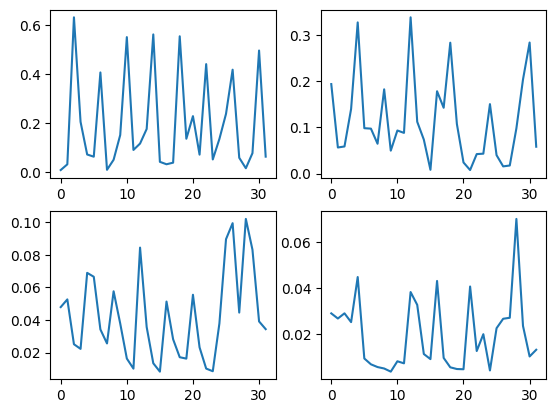

In [566]:
plt.subplot(2, 2, 1)
plt.plot(E_train.features['s_percussive_beat_frames'][0])
plt.subplot(2, 2, 2)
plt.plot(E_train.features['s_percussive_beat_frames'][1])
plt.subplot(2, 2, 3)
plt.plot(E_train.features['s_percussive_beat_frames'][2])
plt.subplot(2, 2, 4)
plt.plot(E_train.features['s_percussive_beat_frames'][3])

In [580]:
from sklearn.cluster import KMeans

class KMeansAdapter(KMeans):
    def transform(self, *args, **kwargs):
        return self.predict(*args, **kwargs).reshape(-1, 1)
    def fit_transform(self, *args, **kwargs):
        return self.fit_predict(*args, **kwargs).reshape(-1, 1)
n_clusters=8
Extractor.register_sklearn_extractor('s_percussive_beat_frames_kmeans', ['s_percussive_beat_frames'], KMeansAdapter(n_clusters=n_clusters))

In [577]:
E_train.train

True

In [581]:
del E_train.features['s_percussive_beat_frames_kmeans']
del E_eval.features['s_percussive_beat_frames_kmeans']
E_train.soft_extract()
E_eval.soft_extract()

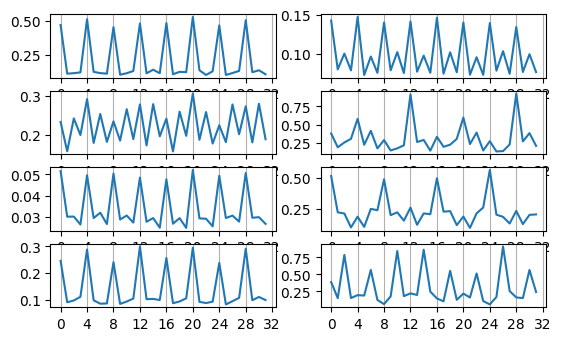

In [582]:
import matplotlib.ticker as ticker
centers = Extractor._stateful_extractors['s_percussive_beat_frames_kmeans'][0].cluster_centers_
h = (len(centers) + 2) // 2
for i, c in enumerate(centers):
    ax = plt.subplot(h, 2, i + 1)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=4))
    plt.plot(c)
    plt.grid(axis='x', which='both')

In [620]:
Extractor.register_sklearn_extractor('s_percussive_beat_frames_svd', ['s_percussive_beat_frames'], 
                                     TruncatedSVD(
                                         n_components=n_tsvd_components, 
                                         n_iter=n_svd_iter, 
                                         random_state=42
                                     ))

In [621]:
E_train.soft_extract()
E_eval.soft_extract()

In [622]:
def sum_beats(E, feature_names, idx, to_idx):
    return [np.array(list(x[1])) for x in pd.DataFrame(data=E.get_features(
        [idx] + feature_names
    ), columns=["idx"] + list(E.get_feature_names_vector(feature_names))) \
    .groupby("idx").agg("sum") \
    .loc[E.get_features([to_idx])[:,0]].iterrows()]
E_train.features['percussive_beat_frames_svd'] = sum_beats(E_train, ["s_percussive_beat_frames_svd"], "s_idx", "idx")
E_eval.features['percussive_beat_frames_svd'] = sum_beats(E_eval, ["s_percussive_beat_frames_svd"], "s_idx", "idx")

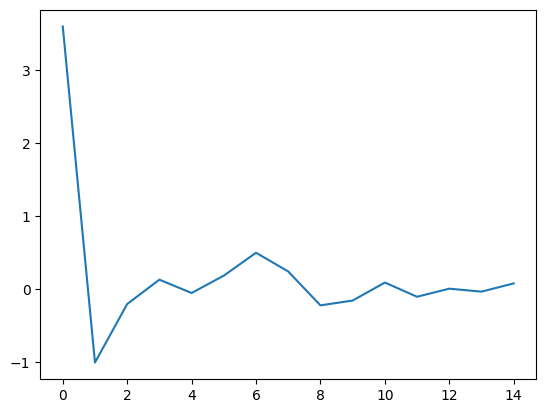

In [624]:
plt.plot(E_train.features['percussive_beat_frames_svd'][10])

In [584]:
def ohe(s):
    v = [0] * n_clusters
    for i in s:
        v[i] += 1
    return v

def aggregate(E, feature_names, idx, to_idx):
    return [np.array(x) for x in pd.DataFrame(data=E.get_features(
        [idx] + feature_names
    ), columns=["idx"] + feature_names) \
    .groupby("idx").agg(ohe) \
    .loc[E.get_features([to_idx])[:,0]]['s_percussive_beat_frames_kmeans']]
E_train.features['percussive_beat_frames_kmeans'] = aggregate(E_train, ["s_percussive_beat_frames_kmeans"], "s_idx", "idx")
E_eval.features['percussive_beat_frames_kmeans'] = aggregate(E_eval, ["s_percussive_beat_frames_kmeans"], "s_idx", "idx")

In [585]:
import importlib
train_and_evaluate_catboost = importlib.reload(importlib.import_module('model')).train_and_evaluate_catboost

In [459]:
# ChatGPT query:
#
# I have an array with feature names and I want to generate weights for the features. Some of the feature names look like <name>_<index>. 
# I want to make a function receiving a dict with prefixes and corresponding feature weights. 
# It should return the np.array of the same shape as feature_names, containing weights. 
# If the feature name starts with prefix from the dict then the weight has to be taken from the dict, otherwise it has to be 1. 
# Here is the signature:
# 
# def assign_feature_weights(feature_names: np.ndarray, weights: dict[str, int]) -> np.ndarray:
#     pass

import numpy as np

def assign_feature_weights(feature_names: np.ndarray, weights: dict[str, float]) -> np.ndarray:
    """
    Assign weights to features based on given prefixes.
    
    Parameters
    ----------
    feature_names : np.ndarray
        Array of feature names.
    weights : dict[str, float]
        Dictionary mapping a prefix (string) to a weight (float).
        
    Returns
    -------
    np.ndarray
        An array of the same shape as `feature_names` containing the assigned weights. 
        If a feature name starts with any prefix in `weights`, the corresponding weight 
        is used. Otherwise, the weight is 1.0.
    """
    result_weights = np.ones_like(feature_names, dtype=float)  # default is 1.0
    
    for i, fname in enumerate(feature_names):
        for prefix, w in weights.items():
            if fname.startswith(prefix):
                result_weights[i] = w
                break  # Stop at the first matching prefix

    return result_weights

In [627]:
features = ['stats', 'rms', 'bpm',
    'cqt_per_freq_mean_svd', 'cqt_per_freq_var_svd', 
    'harmonic_per_freq_mean_svd', 'harmonic_per_freq_var_svd', 
    'percussive_per_freq_mean_svd', 'percussive_per_freq_var_svd',
    'mfcc_quef_mean', 'mfcc_quef_var', 
    'cqt_spectral_centroid_mean', 'cqt_spectral_centroid_var', 
    'cqt_chroma_mean', 'cqt_chroma_var', 
    'harmonic_chroma_freq_mean', 'harmonic_chroma_freq_var', 
    'cqt_rolloff_mean', 'cqt_rolloff_var', 
    'cqt_bandwidth_mean', 'cqt_bandwidth_var',
    'percept_freq_mean_svd', 'percept_freq_var_svd',
    'voiced_f0_mean', 'f0_var',
    'overtones_freq_mean_svd', 'overtones_freq_var_svd',
    ]

weights = assign_feature_weights(E_eval.get_feature_names_vector(features), 
                                 dict(percussive_beat_frames_kmeans=1))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['y'])[:,0], 
    y_eval=E_eval.get_features(['y'])[:,0],
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2703863	test: 0.2766667	best: 0.2766667 (0)	total: 29.5ms	remaining: 14.7s
50:	learn: 0.7939914	test: 0.6700000	best: 0.6833333 (48)	total: 645ms	remaining: 5.68s
100:	learn: 0.8655222	test: 0.7466667	best: 0.7500000 (94)	total: 1.26s	remaining: 4.97s
150:	learn: 0.9184549	test: 0.7900000	best: 0.7900000 (148)	total: 2.07s	remaining: 4.78s
200:	learn: 0.9470672	test: 0.8000000	best: 0.8100000 (186)	total: 2.68s	remaining: 3.99s
250:	learn: 0.9656652	test: 0.8200000	best: 0.8266667 (224)	total: 3.22s	remaining: 3.19s
300:	learn: 0.9771102	test: 0.8300000	best: 0.8300000 (299)	total: 3.76s	remaining: 2.49s
350:	learn: 0.9842632	test: 0.8266667	best: 0.8300000 (299)	total: 4.3s	remaining: 1.83s
400:	learn: 0.9914163	test: 0.8166667	best: 0.8300000 (299)	total: 4.89s	remaining: 1.21s
450:	learn: 0.9942775	test: 0.8266667	best: 0.8333333 (431)	total: 5.42s	remaining: 589ms
499:	learn: 0.9957082	test: 0.8200000	best: 0.8333333 (431)	total: 5.92s	remaining: 0us

bestTest = 0.83333

In [628]:
imp = pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)
imp['stat_name'] = pd.Series(imp.index, index=imp.index).apply(lambda x: int(x[6:]) if x.startswith('stats_') else None)
imp['stat_name'] = imp['stat_name'].apply(lambda x: X_train.columns[int(x) + 2] if not np.isnan(x) else None)
imp

,importance,stat_name
stats_0,3.018497,chroma_stft_mean
percussive_per_freq_var_svd_0,2.555902,None
stats_23,2.440352,mfcc4_mean
stats_5,2.382539,spectral_centroid_var
percept_freq_var_svd_3,2.039267,None
stats_27,1.905468,mfcc6_mean
mfcc_quef_var_3,1.848067,None
stats_8,1.795643,rolloff_mean
percept_freq_var_svd_1,1.703697,None
percept_freq_var_svd_2,1.697748,None


In [631]:
librosa.feature.chroma_stft(y=E_train.features['audio'][0], sr=16000).mean()

0.3874969287822709

In [634]:
E_train.features['stats'][0][0]

0.4286347925662994

In [639]:
name = E_train.features['x'][0][0]
track, sr = librosa.load(f"dataset/Data/genres_original/{name.split(".")[0]}/{name}")

In [643]:
librosa.feature.chroma_stft(y=track, sr=sr).mean()

0.42854875